In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
data = pd.read_csv("data/civic data.csv", parse_dates= [2,4])

In [3]:
ls=[]
for i in range(15,23):
    ls.append(data.columns.values[i])
ls

['Start Location Lat',
 'Start Location Lon',
 'Start Location Accuracy (meters)',
 'End Location Lat',
 'End Location Lon',
 'End Location Accuracy (meters)',
 'Path',
 'Tags']

In [3]:
data = data.drop(['Start Location Lat', 'Start Location Lon', 'Start Location Accuracy (meters)', 'End Location Lat', 'End Location Lon', 'End Location Accuracy (meters)', 'Path'], axis=1)

In [4]:
work = 'Mountain Road'

In [5]:
data.loc[(data['Start Location Name'].str.contains('Mountain Road')==True)|(data['Start Location Name'].str.contains('East Pecos Road, Mesa, AZ 85212, USA ')==True)
         ,'Start Location Name'] ='Work'
data.loc[(data['Start Location Name'].str.contains('Mesquite')==True) |(data['Start Location Name'].str.contains('Ironwood')==True)
         ,'Start Location Name'] ='Home'
data.loc[(data['End Location Name'].str.contains('Mountain Road')==True)|(data['End Location Name'].str.contains('East Pecos Road, Mesa, AZ 85212, USA ')==True)
         ,'End Location Name'] ='Work'
data.loc[data['End Location Name'].str.contains('Mountain Road')==True,'End Location Name'] ='Work'
data.loc[(data['End Location Name'].str.contains('Mesquite')==True) |(data['End Location Name'].str.contains('Ironwood')==True)
         ,'End Location Name'] ='Home'

# 

In [12]:
data['Start Location Name'].unique()

array(['6550 South Mountain Road, Mesa, AZ 85212, USA',
       '380 East Mesquite Street, Gilbert, AZ 85296, USA',
       '1586-1598 East Warner Road, Gilbert, AZ 85296, USA', 'Unknown',
       '2500-2706 West Warner Road, Chandler, AZ 85224, USA',
       '372 East Mesquite Street, Gilbert, AZ 85296, USA',
       '1505 East Warner Road, Gilbert, AZ 85296, USA',
       'Chandler Village Drive South, Chandler, AZ 85226, USA',
       '6815 West Chandler Boulevard, Chandler, AZ 85226, USA',
       'Chandler Fashion Center Road, Chandler, AZ 85226, USA',
       '99 South Hamilton Street, Chandler, AZ 85225, USA',
       '71 West Boston Street, Chandler, AZ 85225, USA',
       'Andersen Fiesta Shopping Center, 1900 West Chandler Boulevard, Chandler, AZ 85224, USA',
       '15612-15644 East Pecos Road, Gilbert, AZ 85297, USA',
       'Main Street Commons, 1967 East Pecos Road, Gilbert, AZ 85295, USA',
       '738-798 West Warner Road, Gilbert, AZ 85233, USA',
       '2025 North Dobson Road, C

In [10]:
date = pd.Series([pd.Timestamp.date(x) for x in data['Start Time']], index=data.index)
data.loc[:, 'date'] = date
data= data.set_index('date', drop=False)

commute_mask = (data['Start Location Name'] =='Home') & (data['End Location Name'] =='Work')|(data['End Location Name'] =='Home') & (data['Start Location Name'] =='Work')
data.loc[commute_mask, 'Tags'] = 'commute'
data.Tags = data.Tags.fillna('Other')

In [11]:
hour = pd.Series([x.hour for x in data['Start Time']], index=data.index)
data.loc[:, 'hour'] = hour

day_dict={0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
dayofweek = pd.Series([day_dict[x.dayofweek] for x in data['Start Time']], index=data.index)
data.loc[:, 'day of week'] = dayofweek

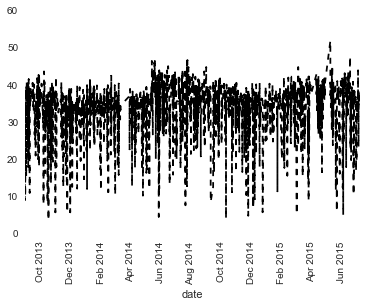

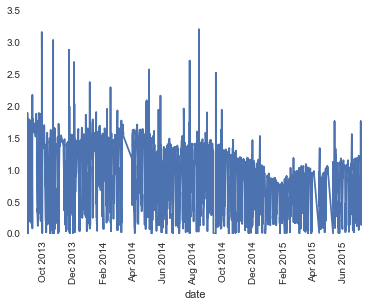

In [12]:
data['Average MPG'].plot(rot=90, style = 'k--')
pd.rolling_mean(data['Average MPG'], 5).plot(rot = 90, style= 'x')
plt.show()
data['Fuel Cost (USD)'].plot(rot=90)
plt.show()

In [9]:
data.head()

,Vehicle,Start Location Name,Start Time,End Location Name,End Time,Distance (mi),Duration (min),Fuel Cost (USD),Average MPG,Fuel Volume (gal),Hard Accelerations,Hard Brakes,Duration Over 70 mph (secs),Duration Over 75 mph (secs),Duration Over 80 mph (secs),Tags,date,hour,day of week
date,,,,,,,,,,,,,,,,,,,
2015-07-08,2003 Honda Civic,Work,2015-07-08 17:32:00,Home,2015-07-08 18:07:00,19.22,34.73,1.51,34.34,0.55,1,0,0,0,0,commute,2015-07-08,17,Wed
2015-07-08,2003 Honda Civic,Home,2015-07-08 06:28:00,Work,2015-07-08 06:52:00,15.52,24.36,1.18,35.52,0.45,0,0,14,0,0,commute,2015-07-08,6,Wed
2015-07-07,2003 Honda Civic,Work,2015-07-07 17:44:00,Home,2015-07-07 18:10:00,15.63,25.62,1.18,35.75,0.45,0,0,191,0,0,commute,2015-07-07,17,Tue
2015-07-07,2003 Honda Civic,Home,2015-07-07 06:30:00,Work,2015-07-07 06:53:00,15.53,23.02,1.15,36.46,0.42,0,0,35,0,0,commute,2015-07-07,6,Tue
2015-07-06,2003 Honda Civic,"1586-1598 East Warner Road, Gilbert, AZ 85296,...",2015-07-06 17:39:00,"1495 East Warner Road, Gilbert, AZ 85296, USA",2015-07-06 17:43:00,2.16,4.75,0.15,39.05,0.05,0,0,0,0,0,Other,2015-07-06,17,Mon


In [13]:
kind= data.groupby(['Tags','day of week'])
kind['Distance (mi)'].mean()


Tags     day of week
Other    Fri             6.511967
         Mon             9.546795
         Sat             6.564847
         Sun             8.611587
         Thurs           5.966989
         Tue             7.965507
         Wed             9.054545
commute  Fri            15.546667
         Mon            15.685638
         Sun            15.700845
         Thurs          15.642000
         Tue            15.842692
         Wed            15.624545
Name: Distance (mi), dtype: float64

In [14]:
j = kind['Distance (mi)'].count().unstack(0)
j.commute= j.commute.fillna(0)
j = j.ix[['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'],:]


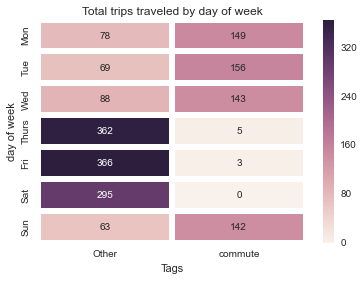

In [15]:
ax = sns.heatmap(j, linewidth=5, annot=True ,fmt=".0f" )
ax.set_title('Total trips traveled by day of week')

In [16]:
other_pt=pd.pivot_table(data[data['Tags']=='Other'], index=['day of week','hour'],aggfunc='count')
other_pt = other_pt.ix[:, 'Average MPG']
other_pt.unstack().ix[['Sun','Mon','Tue','Wed','Thurs','Fri','Sat'],:]

commute_pt=pd.pivot_table(data[data['Tags']=='commute'], index=['day of week','hour'],aggfunc='count')
commute_pt = commute_pt.ix[:, 'Average MPG']
commute_pt.unstack().ix[['Sun','Mon','Tue','Wed','Thurs','Fri','Sat'],:]

hour,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,
Sun,2,5,1,1,45,12,2,NaN,NaN,NaN,1,3,2,2,20,46,NaN
Mon,2,2,NaN,7,48,8,4,NaN,NaN,1,3,1,1,8,12,51,1
Tue,3,5,10,NaN,47,11,1,1,NaN,2,4,1,5,4,22,38,2
Wed,2,5,7,61,NaN,3,NaN,NaN,NaN,NaN,3,1,7,49,4,1,NaN
Thurs,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
Fri,NaN,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'commute_pt' is not defined

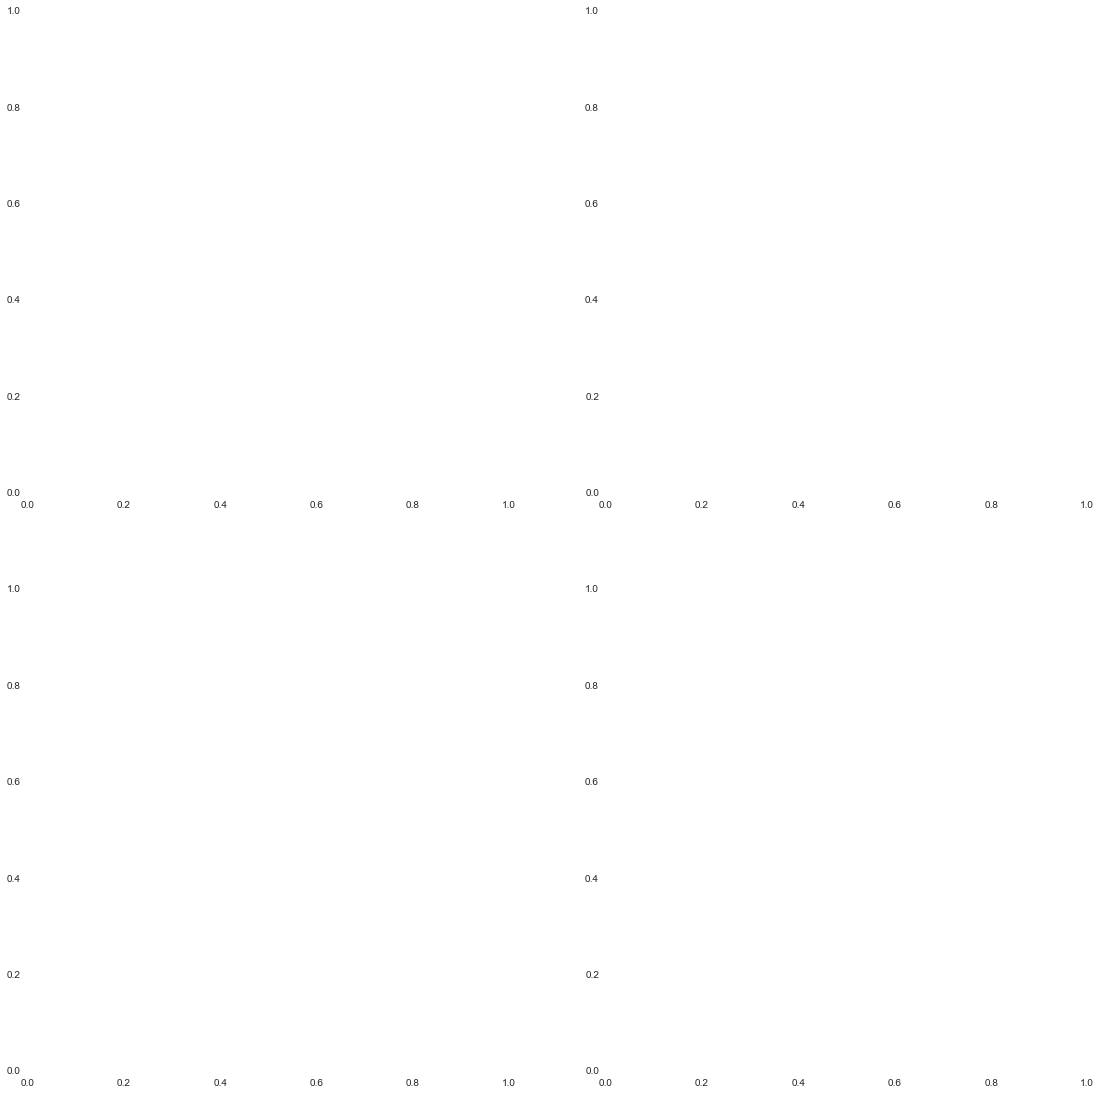

In [13]:
fig,axes= plt.subplots(2,2, figsize=(19,19))

g=sns.heatmap(commute_pt.unstack().ix[['Sun','Mon','Tue','Wed'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='summer',ax=axes[0,0])
g.set_title("weekday, count of 'COMMUTE' trip started by hour")

sns.heatmap(commute_pt.unstack().ix[['Thurs','Fri','Sat'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='summer',ax=axes[1,0])
g.set_title("weekend, count of 'COMMUTE' trip started by hour")
sns.heatmap(other_pt.unstack().ix[['Sun','Mon','Tue','Wed'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='spring',ax=axes[0,1])
g.set_title("weekday, count of 'OTHER' trip started by hour")
sns.heatmap(other_pt.unstack().ix[['Thurs','Fri','Sat'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='spring',ax=axes[1,1])

g.set_title("weekend, count of 'OTHER' trip started by hour")
plt.show()

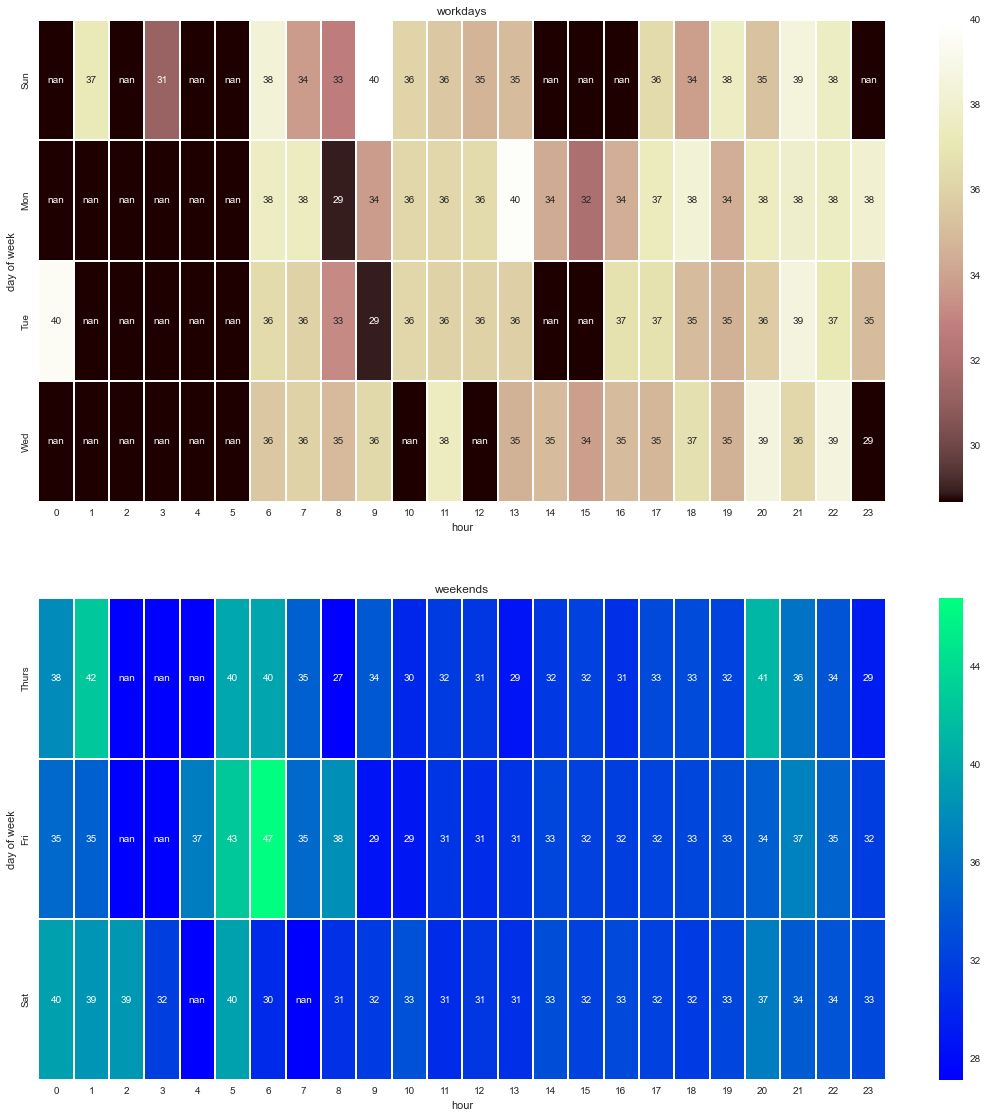

In [17]:
pt=pd.pivot_table(data, index=['day of week','hour'],aggfunc='median')
pt = pt.ix[:, 'Average MPG']
pt.unstack().ix[['Sun','Mon','Tue','Wed','Thurs','Fri','Sat'],:]
f,(ax1, ax2)= plt.subplots(2,1, figsize=(19,19))

sns.heatmap(pt.unstack().ix[['Sun','Mon','Tue','Wed'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='pink',ax=ax1)
ax1.set_title("workdays")
sns.heatmap(pt.unstack().ix[['Thurs','Fri','Sat'],:], linewidth=0.5, annot=True ,fmt=".0f" ,cmap='winter',ax=ax2)
ax2.set_title("weekends")
plt.show()

In [19]:
data.head()

,Vehicle,Start Location Name,Start Time,End Location Name,End Time,Distance (mi),Duration (min),Fuel Cost (USD),Average MPG,Fuel Volume (gal),Hard Accelerations,Hard Brakes,Duration Over 70 mph (secs),Duration Over 75 mph (secs),Duration Over 80 mph (secs),Tags,date,hour,day of week
date,,,,,,,,,,,,,,,,,,,
2015-07-08,2003 Honda Civic,Work,2015-07-08 17:32:00,Home,2015-07-08 18:07:00,19.22,34.73,1.51,34.34,0.55,1,0,0,0,0,commute,2015-07-08,17,Wed
2015-07-08,2003 Honda Civic,Home,2015-07-08 06:28:00,Work,2015-07-08 06:52:00,15.52,24.36,1.18,35.52,0.45,0,0,14,0,0,commute,2015-07-08,6,Wed
2015-07-07,2003 Honda Civic,Work,2015-07-07 17:44:00,Home,2015-07-07 18:10:00,15.63,25.62,1.18,35.75,0.45,0,0,191,0,0,commute,2015-07-07,17,Tue
2015-07-07,2003 Honda Civic,Home,2015-07-07 06:30:00,Work,2015-07-07 06:53:00,15.53,23.02,1.15,36.46,0.42,0,0,35,0,0,commute,2015-07-07,6,Tue
2015-07-06,2003 Honda Civic,"1586-1598 East Warner Road, Gilbert, AZ 85296,...",2015-07-06 17:39:00,"1495 East Warner Road, Gilbert, AZ 85296, USA",2015-07-06 17:43:00,2.16,4.75,0.15,39.05,0.05,0,0,0,0,0,Other,2015-07-06,17,Mon


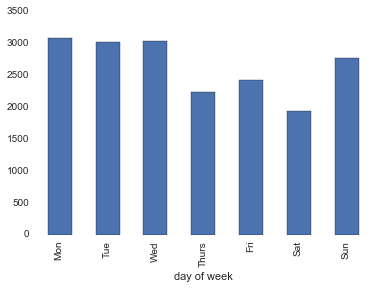

In [32]:
result = data.groupby(['day of week'])['Distance (mi)'].sum()
result.ix[['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']].plot(kind='bar')

In [55]:
mmm= data.groupby(['day of week','hour'])['Average MPG'].mean().unstack('hour')

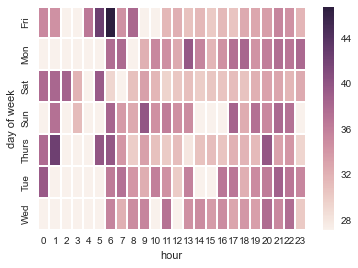

In [56]:
sns.heatmap(data=mmm)